In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [2]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
train = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
test = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')
train

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          2       0       0       0       0       0       0       0       0   
1          9       0       0       0       0       0       0       0       0   
2          6       0       0       0       0       0       0       0       5   
3          0       0       0       0       1       2       0       0       0   
4          3       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995      9       0       0       0       0       0       0       0       0   
59996      1       0       0       0       0       0       0       0       0   
59997      8       0       0       0       0       0       0       0       0   
59998      8       0       0       0       0       0       0       0       0   
59999      7       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0        30        43   
3           0  ...         3         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
59995       0  ...         0         0         0         0         0   
59996       0  ...        73         0         0         0         0   
59997       0  ...       160       162       163       135        94   
59998       0  ...         0         0         0         0         0   
59999       0  ...         0         0         0         0         0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             1         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
59995         0         0         0         0         0  
59996         0         0         0         0         0  
59997         0         0         0         0         0  
59998         0         0         0         0         0  
59999         0         0         0         0         0  

[60000 rows x 785 columns]

# Data visualization

In [4]:
train.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [6]:
train.describe()

label        pixel1        pixel2        pixel3        pixel4  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       4.500000      0.000900      0.006150      0.035333      0.101933   
std        2.872305      0.094689      0.271011      1.222324      2.452871   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.500000      0.000000      0.000000      0.000000      0.000000   
75%        7.000000      0.000000      0.000000      0.000000      0.000000   
max        9.000000     16.000000     36.000000    226.000000    164.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.247967      0.411467      0.805767      2.198283      5.682000   
std        4.306912      5.836188      8.215169     14.093378     23.819481   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      227.000000    230.000000    224.000000    255.000000    254.000000   

       ...      pixel775      pixel776      pixel777      pixel778  \
count  ...  60000.000000  60000.000000  60000.000000  60000.000000   
mean   ...     34.625400     23.300683     16.588267     17.869433   
std    ...     57.545242     48.854427     41.979611     43.966032   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...     58.000000      9.000000      0.000000      0.000000   
max    ...    255.000000    255.000000    255.000000    255.000000   

           pixel779      pixel780      pixel781      pixel782      pixel783  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean      22.814817     17.911483      8.520633      2.753300      0.855517   
std       51.830477     45.149388     29.614859     17.397652      9.356960   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      255.000000    255.000000    255.000000    255.000000    255.000000   

          pixel784  
count  60000.00000  
mean       0.07025  
std        2.12587  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        0.00000  
max      170.00000  

[8 rows x 785 columns]


--- Distribution of Pixel Intensities in Training Data ---
Shape of all_pixel_values: (47040000,)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


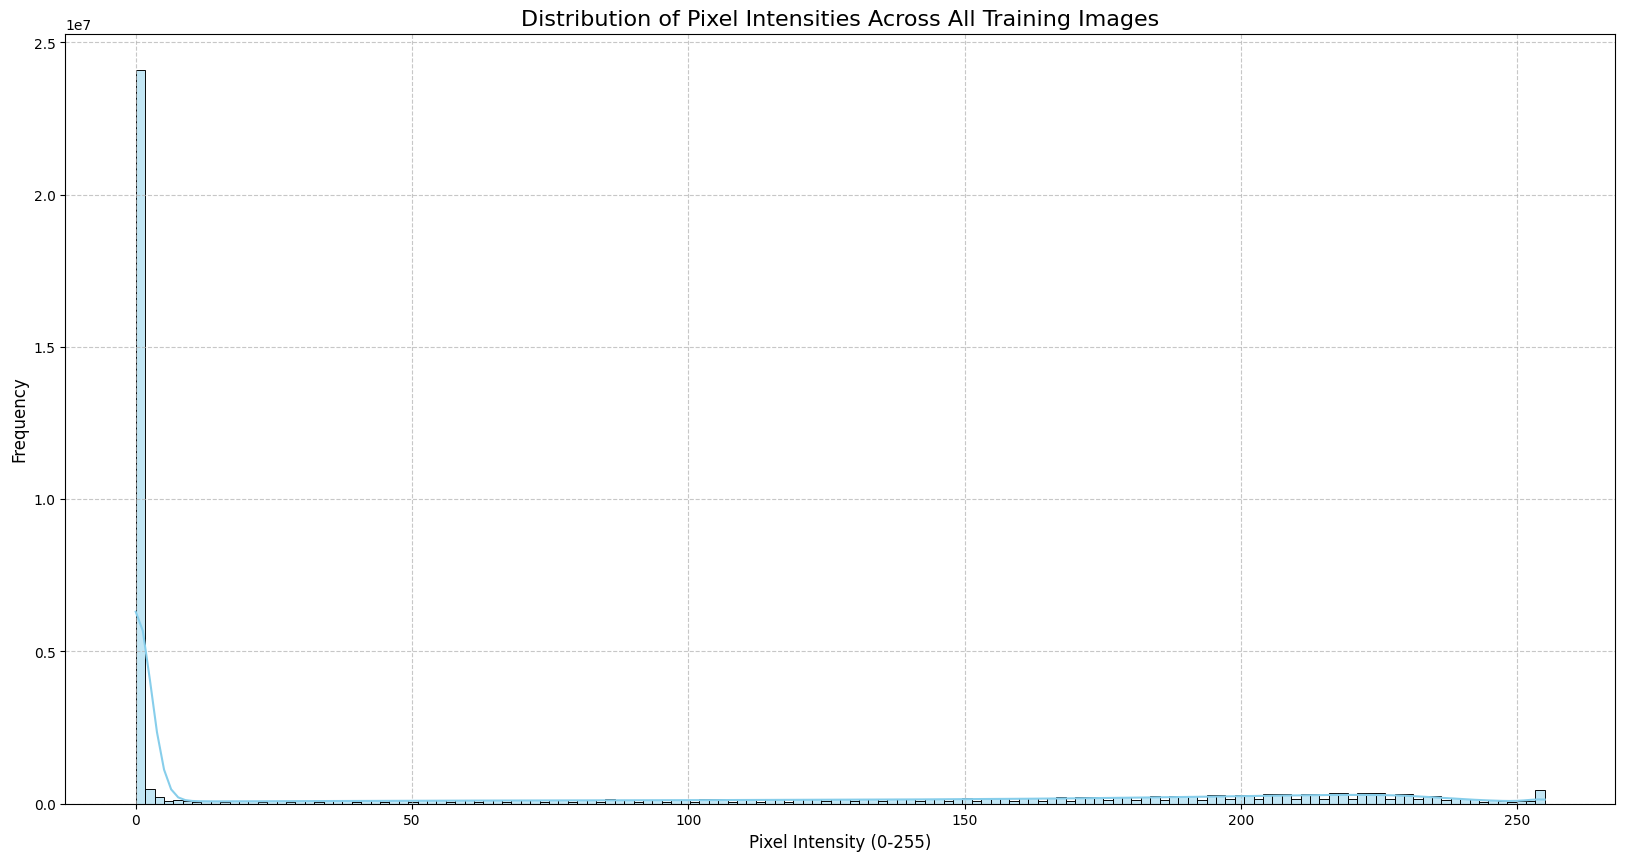

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # Import pandas for DataFrame operations
import seaborn as sns # Import seaborn for plotting

# --- Plot distribution of pixel in train dataframe ---
print("\n--- Distribution of Pixel Intensities in Training Data ---")

# Select only the pixel columns (excluding the 'label' column)
pixel_data = train.drop('label', axis=1)

# Flatten all pixel values into a single array
all_pixel_values = pixel_data.values.flatten()

# --- Fix for FutureWarning: Ensure no NaN or inf values are present ---
# This explicitly addresses the warning by cleaning the data before plotting.
# For pixel data (0-255), this is often redundant but good practice.
all_pixel_values = all_pixel_values[~np.isinf(all_pixel_values)]
all_pixel_values = all_pixel_values[~np.isnan(all_pixel_values)]
# --- End of Fix ---

print(f"Shape of all_pixel_values: {all_pixel_values.shape}")
if all_pixel_values.size > 0:
    plt.figure(figsize=(20, 10))
    sns.histplot(all_pixel_values, bins=150, kde=True, color='skyblue')
    plt.title('Distribution of Pixel Intensities Across All Training Images', fontsize=16)
    plt.xlabel('Pixel Intensity (0-255)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
else:
    print("No pixel data available to plot the distribution.")

In [8]:
label = train['label']
label = set(label)
label

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [9]:
train['label'].value_counts(normalize=True)*100

label
2    10.0
9    10.0
6    10.0
0    10.0
3    10.0
4    10.0
5    10.0
8    10.0
7    10.0
1    10.0
Name: proportion, dtype: float64

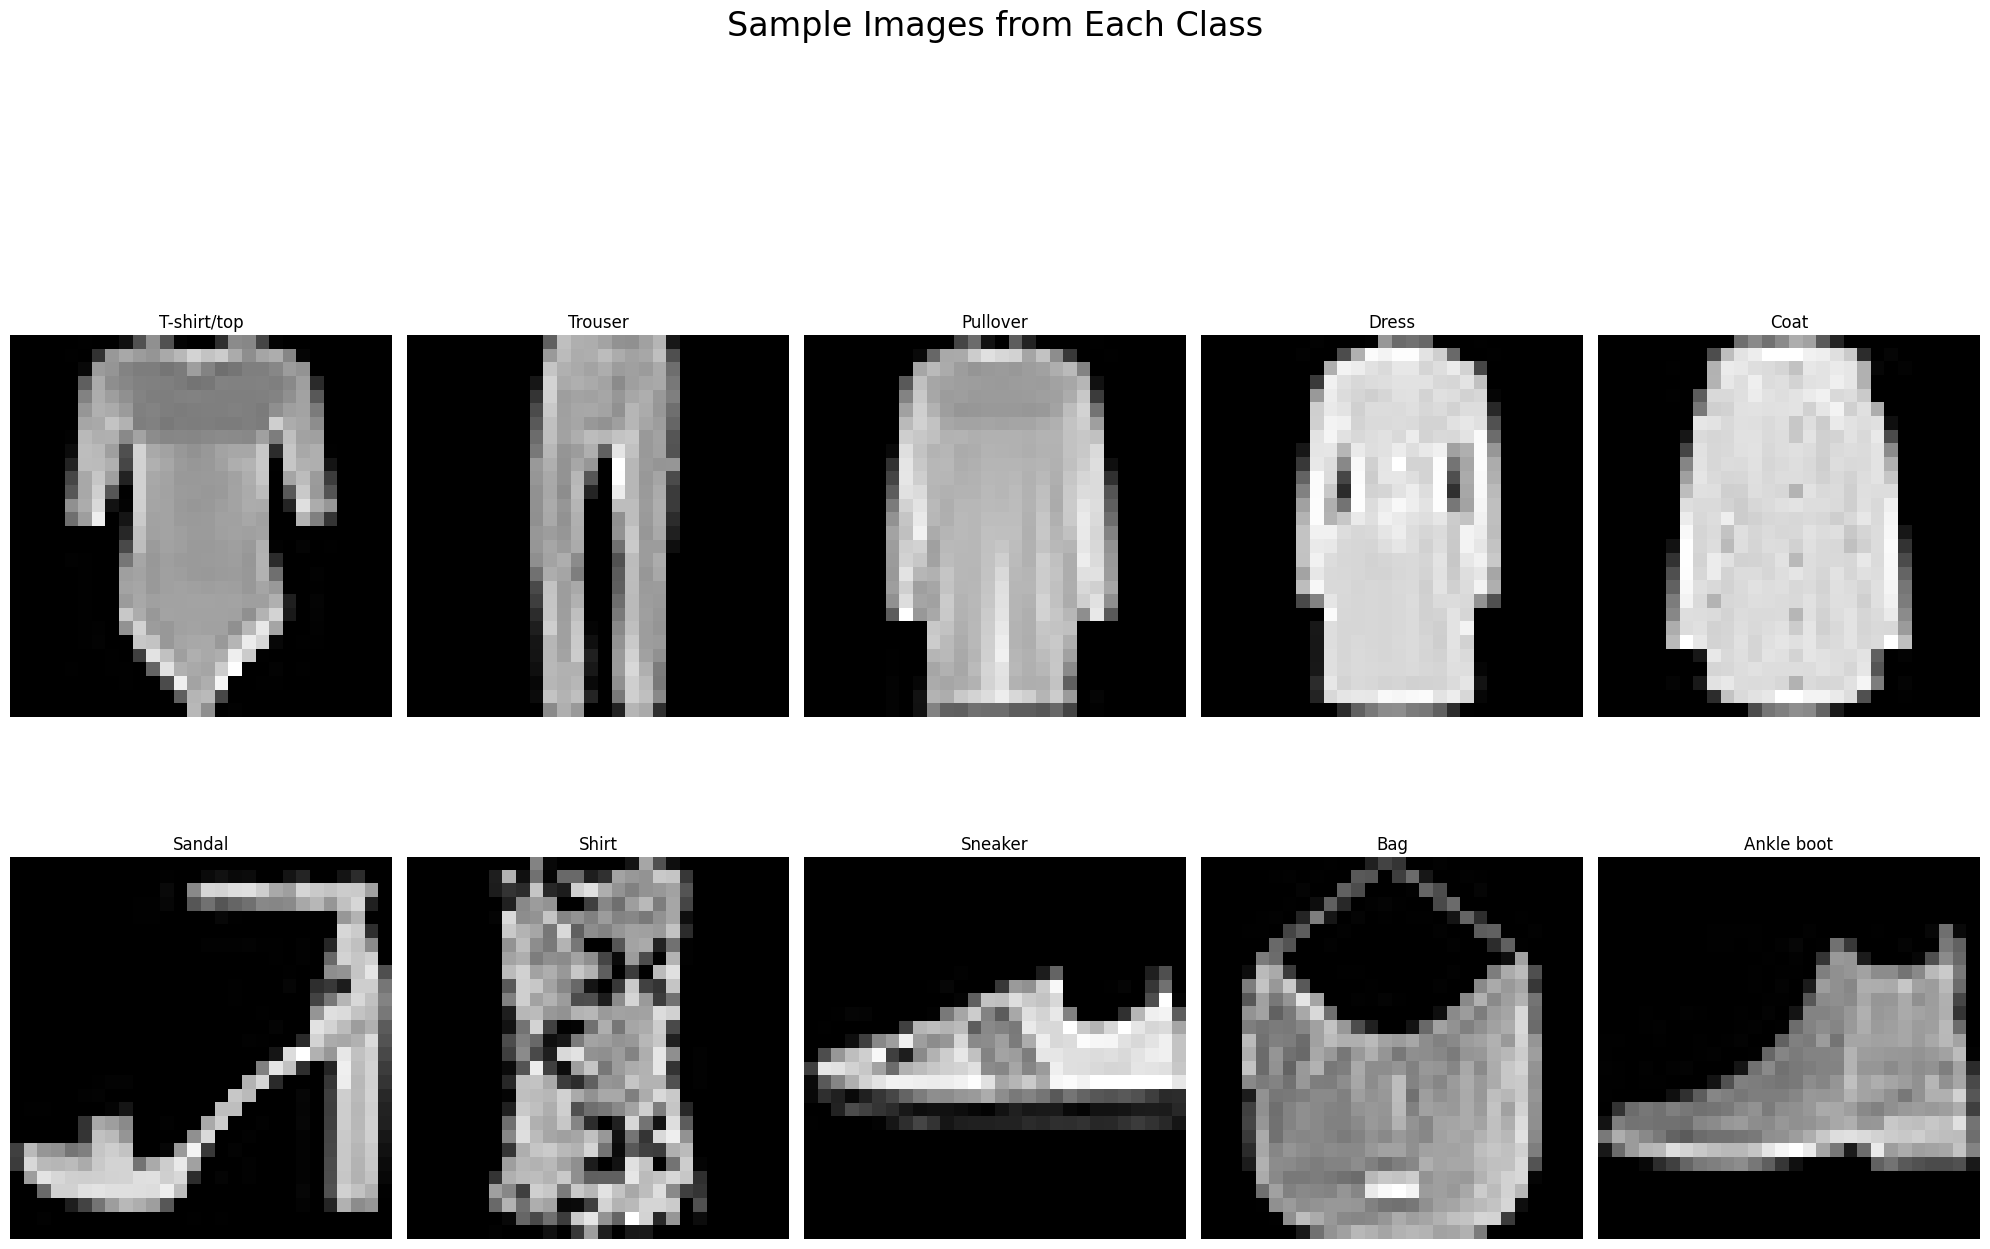

In [10]:
# --- Define 'y' as expected by your code ---
y = train['label']

# --- Dynamically get pixel column names ---
# Drop the 'label' column to get the pixel columns
pixel_cols = train.drop('label', axis=1).columns.tolist()


# --- Define the label dictionary (as provided in your query) ---
label_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

plt.figure(figsize=(20, 15)) # Adjusted figure size for better display
# Loop through each unique label to plot a sample image
for i, class_id in enumerate(label_dict.keys()): # Iterate through the keys (0-9) of the label_dict
    plt.subplot(2, 5, i + 1) # Create a 2x5 grid of subplots

    # Select samples belonging to the current class_id
    # Ensure y is a pandas Series for boolean indexing with .loc
    if isinstance(y, pd.Series):
        samples_for_class = train.loc[y == class_id, pixel_cols]
    else: # Fallback if y is a numpy array, convert to Series for .loc
        samples_for_class = train.loc[pd.Series(y) == class_id, pixel_cols]

    # Check if there are any samples for this class before trying to sample
    if not samples_for_class.empty:
        # Take one random sample from the selected class
        sample = samples_for_class.sample(1)
        # Reshape the 1x784 (or 1x(28*28)) row into a 28x28 image array
        # .values[0] converts the DataFrame row to a NumPy array
        image_array = np.reshape(sample.values[0], (28, 28))

        # Display the image
        plt.gca().imshow(image_array, cmap='gray', vmin=0, vmax=255)
        # Set the title using the descriptive label from the dictionary
        plt.title(label_dict[class_id])
        plt.axis('off') # Turn off axis ticks and labels for cleaner image display
    else:
        plt.title(f"No samples for {label_dict[class_id]}")
        plt.axis('off')


plt.suptitle('Sample Images from Each Class\n', fontsize=24) # Add a main title
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

# Feature Engineering

In [11]:
from sklearn.model_selection import train_test_split
# Separate features (X) and labels (y)
x_train_raw = train.drop('label', axis=1)
y_train_raw = train['label']
x_test_raw = test.drop('label', axis=1)
y_test_raw = test['label']

# Print the shapes of the resulting sets
print("X_train shape:", x_train_raw.shape)
print("y_train shape:", y_train_raw.shape)
print("X_test shape:", x_test_raw.shape)
print("y_test shape:", y_test_raw.shape)

X_train shape: (60000, 784)
y_train shape: (60000,)
X_test shape: (10000, 784)
y_test shape: (10000,)


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # For plotting, though not directly used in this CNN section for plots

print(f"PyTorch Version: {torch.__version__}")

# Normalize pixel values to [0, 1]
x_train_normalized = x_train_raw.values / 255.0
x_test_normalized = x_test_raw.values / 255.0

# Reshape images for PyTorch CNN input: (batch_size, channels, height, width)
# Fashion MNIST images are grayscale, so channels = 1
x_train_cnn = x_train_normalized.reshape(-1, 1, 28, 28)
x_test_cnn = x_test_normalized.reshape(-1, 1, 28, 28)

# Convert to PyTorch Tensors
# Features should be float32, labels should be long (for CrossEntropyLoss)
x_train_tensor = torch.tensor(x_train_cnn, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_raw.values, dtype=torch.long)
x_test_tensor = torch.tensor(x_test_cnn, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_raw.values, dtype=torch.long)

# Determine the number of classes
num_classes = len(np.unique(y_train_raw.values))

print(f"x_train_tensor shape: {x_train_tensor.shape}")
print(f"y_train_tensor shape: {y_train_tensor.shape}")
print(f"x_test_tensor shape: {x_test_tensor.shape}")
print(f"y_test_tensor shape: {y_test_tensor.shape}")
print(f"Number of classes: {num_classes}")
print("="*40 + "\n")

PyTorch Version: 2.6.0+cu124
x_train_tensor shape: torch.Size([60000, 1, 28, 28])
y_train_tensor shape: torch.Size([60000])
x_test_tensor shape: torch.Size([10000, 1, 28, 28])
y_test_tensor shape: torch.Size([10000])
Number of classes: 10



# Modeling

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split # Import random_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # For plotting, though not directly used in this CNN section for plots

# --- 2. Create PyTorch Dataset and DataLoader ---
# Custom Dataset class
class FashionMNISTDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Instantiate the full training dataset
full_train_dataset = FashionMNISTDataset(x_train_tensor, y_train_tensor)
test_dataset = FashionMNISTDataset(x_test_tensor, y_test_tensor)

# Split full_train_dataset into training and validation sets
train_size = int(0.8 * len(full_train_dataset)) # 80% for training
val_size = len(full_train_dataset) - train_size # Remaining 20% for validation
train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size])

print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")


# Create DataLoaders
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
# Shuffle validation data on every epoch as requested
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

print(f"Number of batches in train_loader: {len(train_loader)}")
print(f"Number of batches in val_loader: {len(val_loader)}") # Print val_loader info
print(f"Number of batches in test_loader: {len(test_loader)}")
print("="*40 + "\n")

# --- 3. Define the CNN Model ---
class CNN(nn.Module):
    def __init__(self, num_classes=10):
        super(CNN, self).__init__()
        # First convolutional block
        # Input: (batch_size, 1, 28, 28)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1) # Output: (batch_size, 32, 28, 28)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2) # Output: (batch_size, 32, 14, 14)

        # Second convolutional block
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1) # Output: (batch_size, 64, 14, 14)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2) # Output: (batch_size, 64, 7, 7)

        # Fully connected layers
        # Flatten the output of the convolutional layers: 64 channels * 7x7 image size = 3136 features
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.relu3 = nn.ReLU()
        # New dense layer added after the original dense layer (fc1)
        self.fc_intermediate = nn.Linear(128, 64)
        self.relu_intermediate = nn.ReLU()
        # Original fc2, now taking input from the new intermediate layer
        self.fc_output = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7) # Flatten the tensor
        x = self.relu3(self.fc1(x))
        x = self.relu_intermediate(self.fc_intermediate(x)) # Forward pass for the new layer
        x = self.fc_output(x) # Use the new output layer name
        return x

# Instantiate the CNN model
model = CNN(num_classes=10)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print("\n--- CNN Model Architecture ---")
print(model)
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Number of trainable parameters: {total_params}")
print(f"Using device: {device}")
print("="*40 + "\n")

# --- 4. Define Loss Function and Optimizer ---
# For multi-class classification, CrossEntropyLoss is suitable.
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# --- 5. Training Loop ---
num_epochs = 100 # Increased epochs to allow early stopping to kick in
train_losses = []
train_accuracies = []
val_losses = [] # Added for validation loss
val_accuracies = [] # Added for validation accuracy
# test_accuracies = [] # Removed as per request to not validate on test dataset per epoch

# Early Stopping parameters
early_stopping_patience = 8 # Set patience to 8 epochs as requested
best_val_loss = float('inf')
epochs_no_improve = 0
best_model_state = None # To store the best model weights

print("--- Starting Training ---")
for epoch in range(num_epochs):
    model.train() # Set model to training mode
    running_train_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device) # Move data to device

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    epoch_train_loss = running_train_loss / len(train_loader)
    epoch_train_accuracy = 100 * correct_train / total_train
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_accuracy)

    # --- Evaluation on Validation Set ---
    model.eval() # Set model to evaluation mode
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad(): # Disable gradient calculation for evaluation
        for images, labels in val_loader: # Use val_loader
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            val_loss = criterion(outputs, labels) # Calculate validation loss
            running_val_loss += val_loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    epoch_val_loss = running_val_loss / len(val_loader)
    epoch_val_accuracy = 100 * correct_val / total_val
    val_losses.append(epoch_val_loss) # Store validation loss
    val_accuracies.append(epoch_val_accuracy) # Store validation accuracy

    # --- Early Stopping Logic ---
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        epochs_no_improve = 0
        best_model_state = model.state_dict() # Save the best model weights
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= early_stopping_patience:
            print(f'Early stopping triggered at epoch {epoch+1}. No improvement for {early_stopping_patience} epochs.')
            model.load_state_dict(best_model_state) # Restore best model weights
            break # Exit the training loop

    # Removed: Evaluation on Test Set (after each epoch)
    # This was removed as per the request to not validate on test dataset per epoch.
    # The final evaluation on the test set will still be performed after training.

    print(f'Epoch [{epoch+1}/{num_epochs}] | '
          f'Train Loss: {epoch_train_loss:.4f} | '
          f'Train Acc: {epoch_train_accuracy:.2f}% | '
          f'Val Loss: {epoch_val_loss:.4f} | '
          f'Val Acc: {epoch_val_accuracy:.2f}%')

print("\n--- Training Complete ---")
print("="*40 + "\n")

Training dataset size: 48000
Validation dataset size: 12000
Number of batches in train_loader: 750
Number of batches in val_loader: 188
Number of batches in test_loader: 157


--- CNN Model Architecture ---
CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (relu3): ReLU()
  (fc_intermediate): Linear(in_features=128, out_features=64, bias=True)
  (relu_intermediate): ReLU()
  (fc_output): Linear(in_features=64, out_features=10, bias=True)
)
Number of trainable parameters: 429258
Using device: cpu

--- Starting Training ---
Epoch [1/100] | Train Loss: 0.8715 | Train Acc: 69.35% | Val Loss: 0.5526 | Val Acc: 79.67%

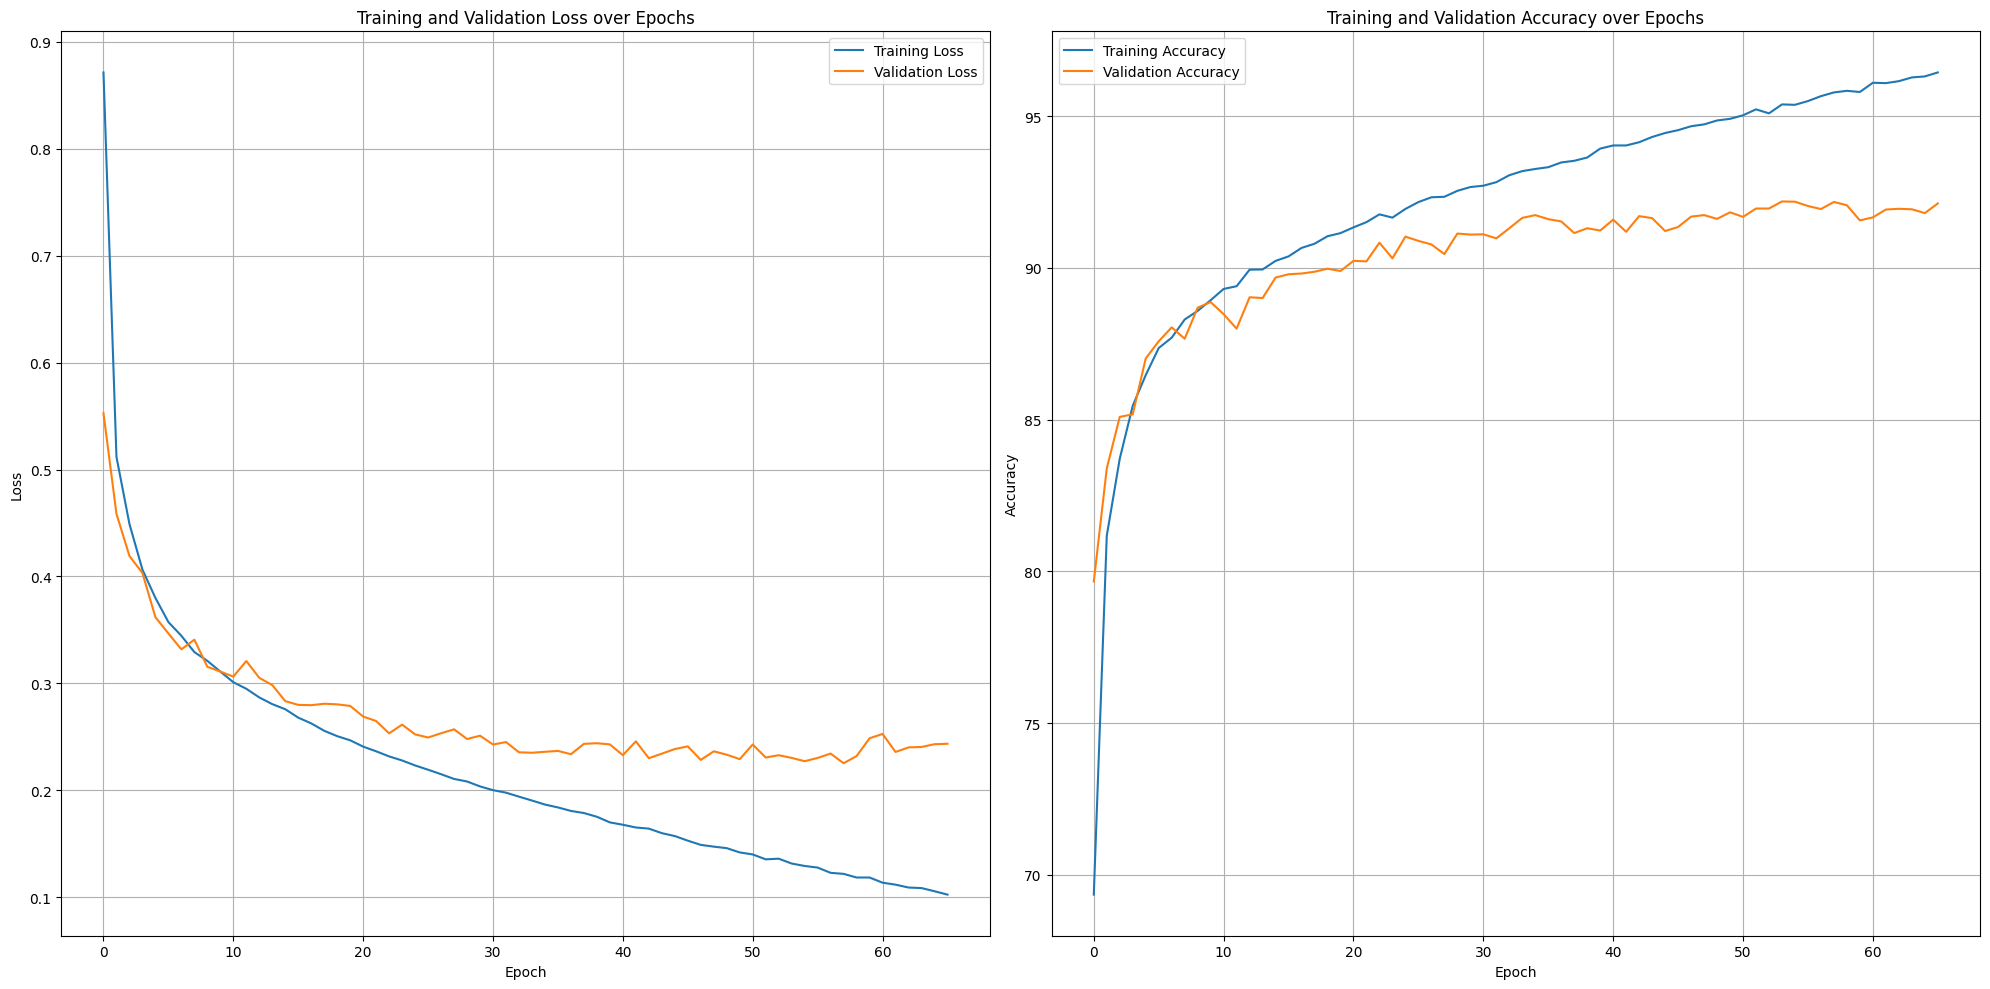

In [14]:
# --- 6. Plotting Training History ---
plt.figure(figsize=(20, 10))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss') # Plot validation loss
plt.title('Training and Validation Loss over Epochs') # Updated title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy') # Plot validation accuracy
# Removed: plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Training and Validation Accuracy over Epochs') # Updated title
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

/tmp/ipykernel_13/25570857.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Keep rect for overall figure padding


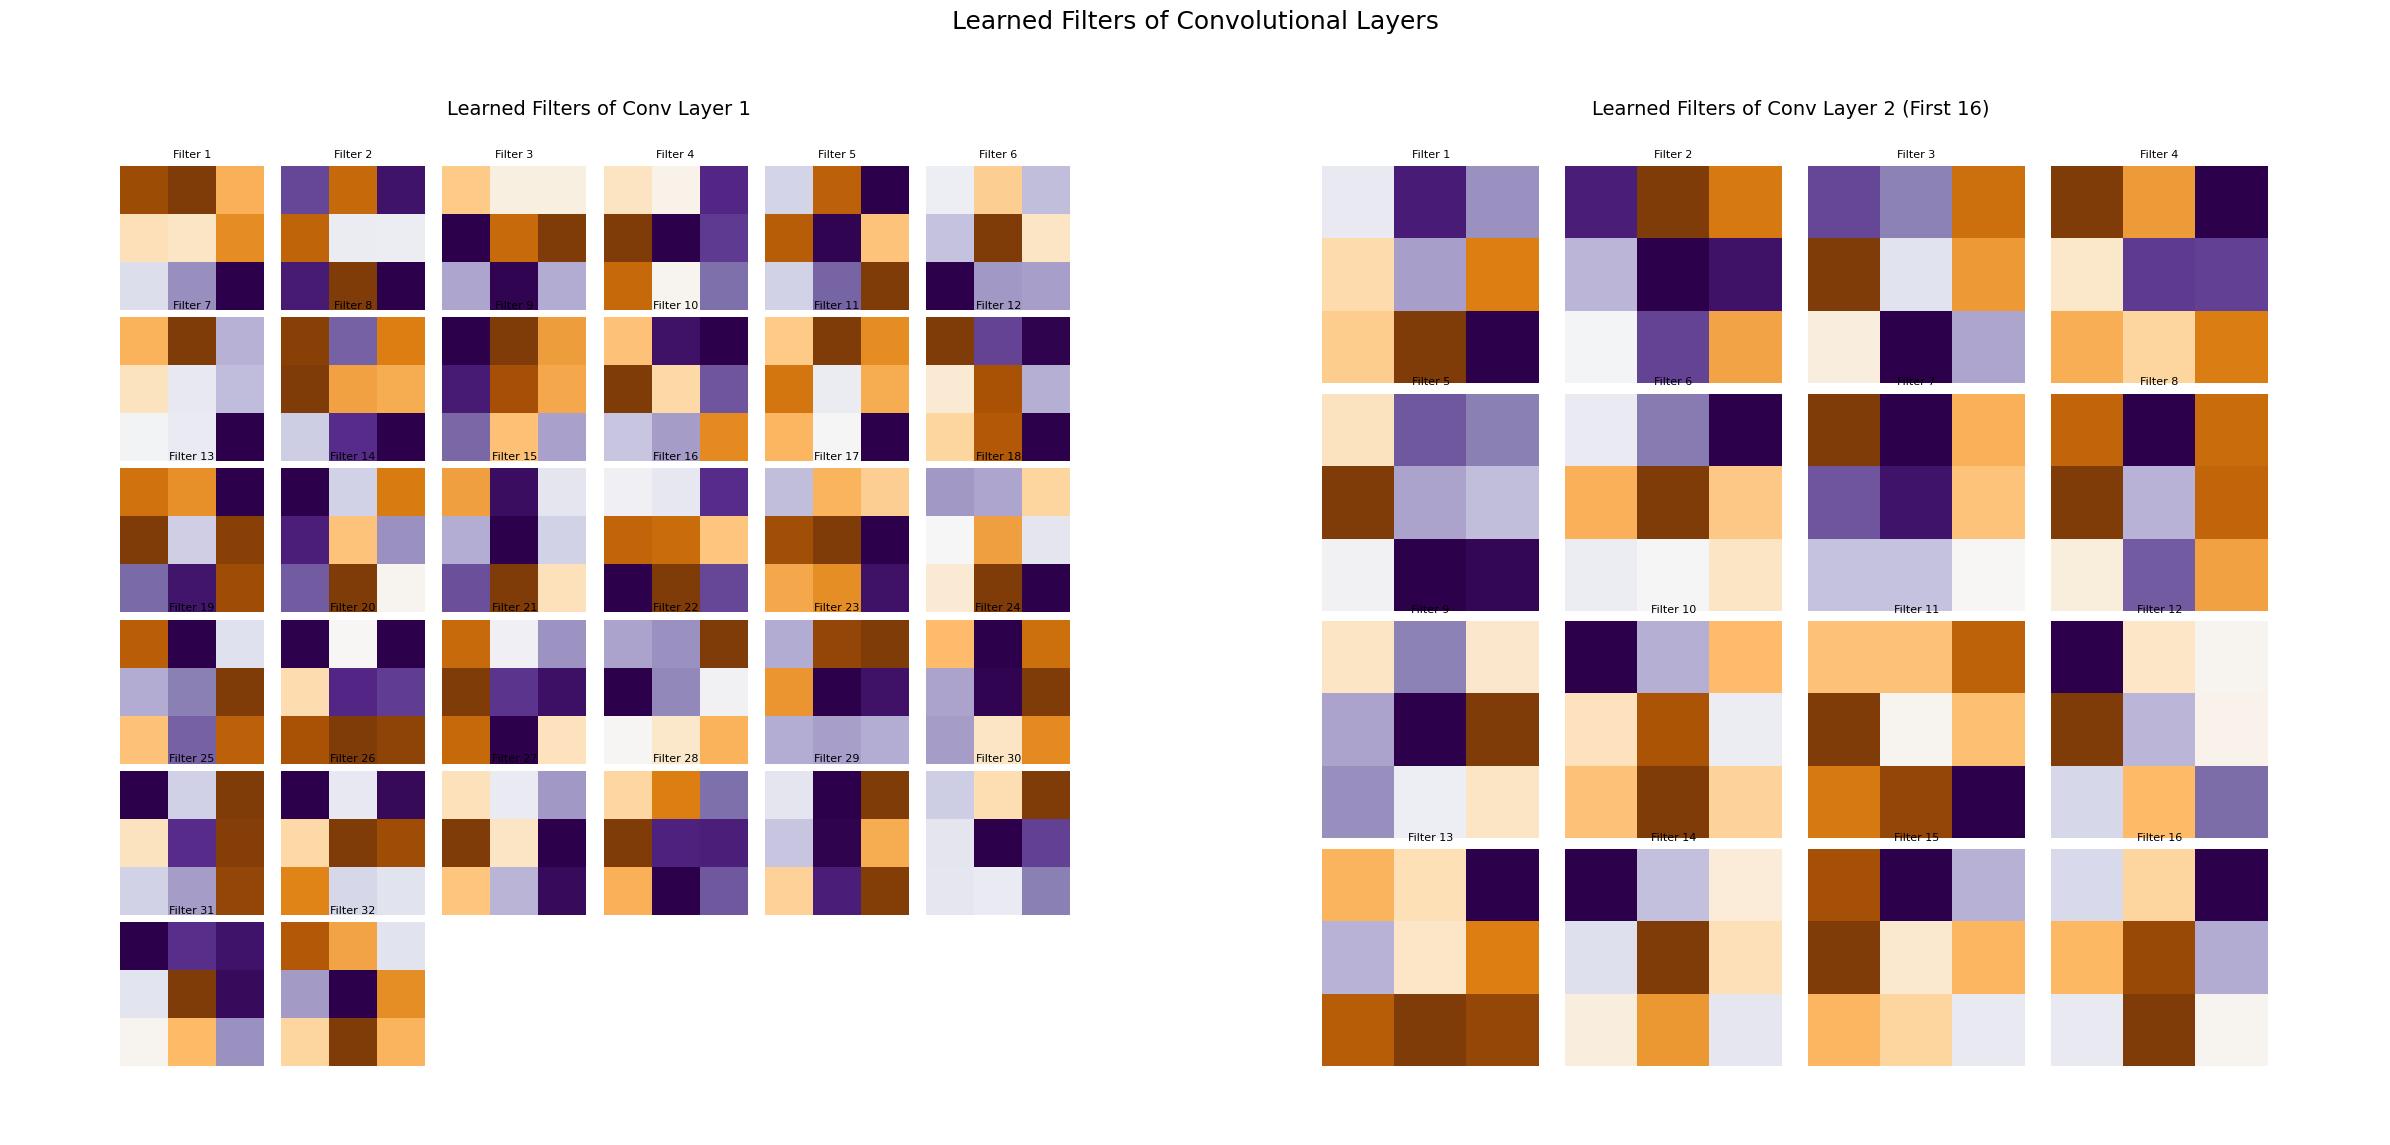

In [15]:
# Ensure the model is on CPU for visualization if it was on GPU
model.to('cpu')

# Access the weights of the first convolutional layer (conv1)
filters_conv1 = model.conv1.weight.data.clone().cpu().numpy()
num_filters_conv1 = filters_conv1.shape[0]

# Access the weights of the second convolutional layer (conv2)
filters_conv2 = model.conv2.weight.data.clone().cpu().numpy()
num_filters_conv2 = filters_conv2.shape[0]

# Set a fixed figure size for both plots to be the same
# Adjusted figsize to accommodate two large grids of filters side-by-side
fixed_figsize = (24, 12)

# Create the main figure and subplots for the filter visualization
fig, axes = plt.subplots(1, 2, figsize=fixed_figsize) # Use fig, axes for better control

# Subplot 1: Convolutional Layer 1 Filters
ax1 = axes[0] # Get the first subplot axis
ax1.set_title('Learned Filters of Conv Layer 1', fontsize=14, pad=20) # Added pad to title
ax1.axis('off') # Turn off axis for the main subplot

# Calculate grid dimensions for conv1 filters
grid_cols_conv1 = int(np.ceil(np.sqrt(num_filters_conv1)))
grid_rows_conv1 = int(np.ceil(num_filters_conv1 / grid_cols_conv1))

# Create a subgrid within ax1 for conv1 filters
gs1 = plt.GridSpec(grid_rows_conv1, grid_cols_conv1, figure=fig)
# Adjust position and spacing for conv1 filters, ensuring it's within the left half
gs1.update(left=0.05, right=0.45, wspace=0.05, hspace=0.05, top=0.85, bottom=0.1) # Adjusted top/bottom

for i in range(num_filters_conv1):
    # Add subplot to the first main axis's grid
    ax_filter1 = fig.add_subplot(gs1[i // grid_cols_conv1, i % grid_cols_conv1])
    filter_img = filters_conv1[i, 0, :, :] # Grayscale input, so 0th channel

    min_val, max_val = filter_img.min(), filter_img.max()
    if max_val - min_val > 1e-6:
        filter_img = (filter_img - min_val) / (max_val - min_val)
    else:
        filter_img = np.zeros_like(filter_img)

    ax_filter1.imshow(filter_img, cmap='PuOr') # Use 'PuOr' colormap
    ax_filter1.set_title(f'Filter {i+1}', fontsize=8)
    ax_filter1.axis('off')

# Subplot 2: Convolutional Layer 2 Filters (First 16 for brevity)
ax2 = axes[1] # Get the second subplot axis
ax2.set_title('Learned Filters of Conv Layer 2 (First 16)', fontsize=14, pad=20) # Added pad to title
ax2.axis('off') # Turn off axis for the main subplot

plot_filters_count_conv2 = min(16, num_filters_conv2) # Limit to 16 for display
grid_cols_conv2 = int(np.ceil(np.sqrt(plot_filters_count_conv2)))
grid_rows_conv2 = int(np.ceil(plot_filters_count_conv2 / grid_cols_conv2))

# Create a subgrid within ax2 for conv2 filters
gs2 = plt.GridSpec(grid_rows_conv2, grid_cols_conv2, figure=fig)
# Adjust position and spacing for conv2 filters, ensuring it's within the right half
gs2.update(left=0.55, right=0.95, wspace=0.05, hspace=0.05, top=0.85, bottom=0.1) # Adjusted top/bottom

for i in range(plot_filters_count_conv2):
    # Add subplot to the second main axis's grid
    ax_filter2 = fig.add_subplot(gs2[i // grid_cols_conv2, i % grid_cols_conv2])
    filter_img_conv2 = filters_conv2[i, :, :, :].mean(axis=0) # Mean across input channels

    min_val, max_val = filter_img_conv2.min(), filter_img_conv2.max()
    if max_val - min_val > 1e-6:
        filter_img_conv2 = (filter_img_conv2 - min_val) / (max_val - min_val)
    else:
        filter_img_conv2 = np.zeros_like(filter_img_conv2)

    ax_filter2.imshow(filter_img_conv2, cmap='PuOr')
    ax_filter2.set_title(f'Filter {i+1}', fontsize=8)
    ax_filter2.axis('off')

# Set an overall title for the entire figure
fig.suptitle('Learned Filters of Convolutional Layers', fontsize=18, y=0.98) # Adjusted y for suptitle

# Adjust layout to prevent overlapping titles/labels. rect is for the entire figure.
# We're already using gs.update for subgrid positions, so tight_layout might need less rect adjustment
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Keep rect for overall figure padding
plt.show()


--- Visualizing CNN Latent Space (PCA of fc_intermediate output) on Training Data ---


/tmp/ipykernel_13/2563439956.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_regions = plt.cm.get_cmap('viridis', 10) # 10 classes


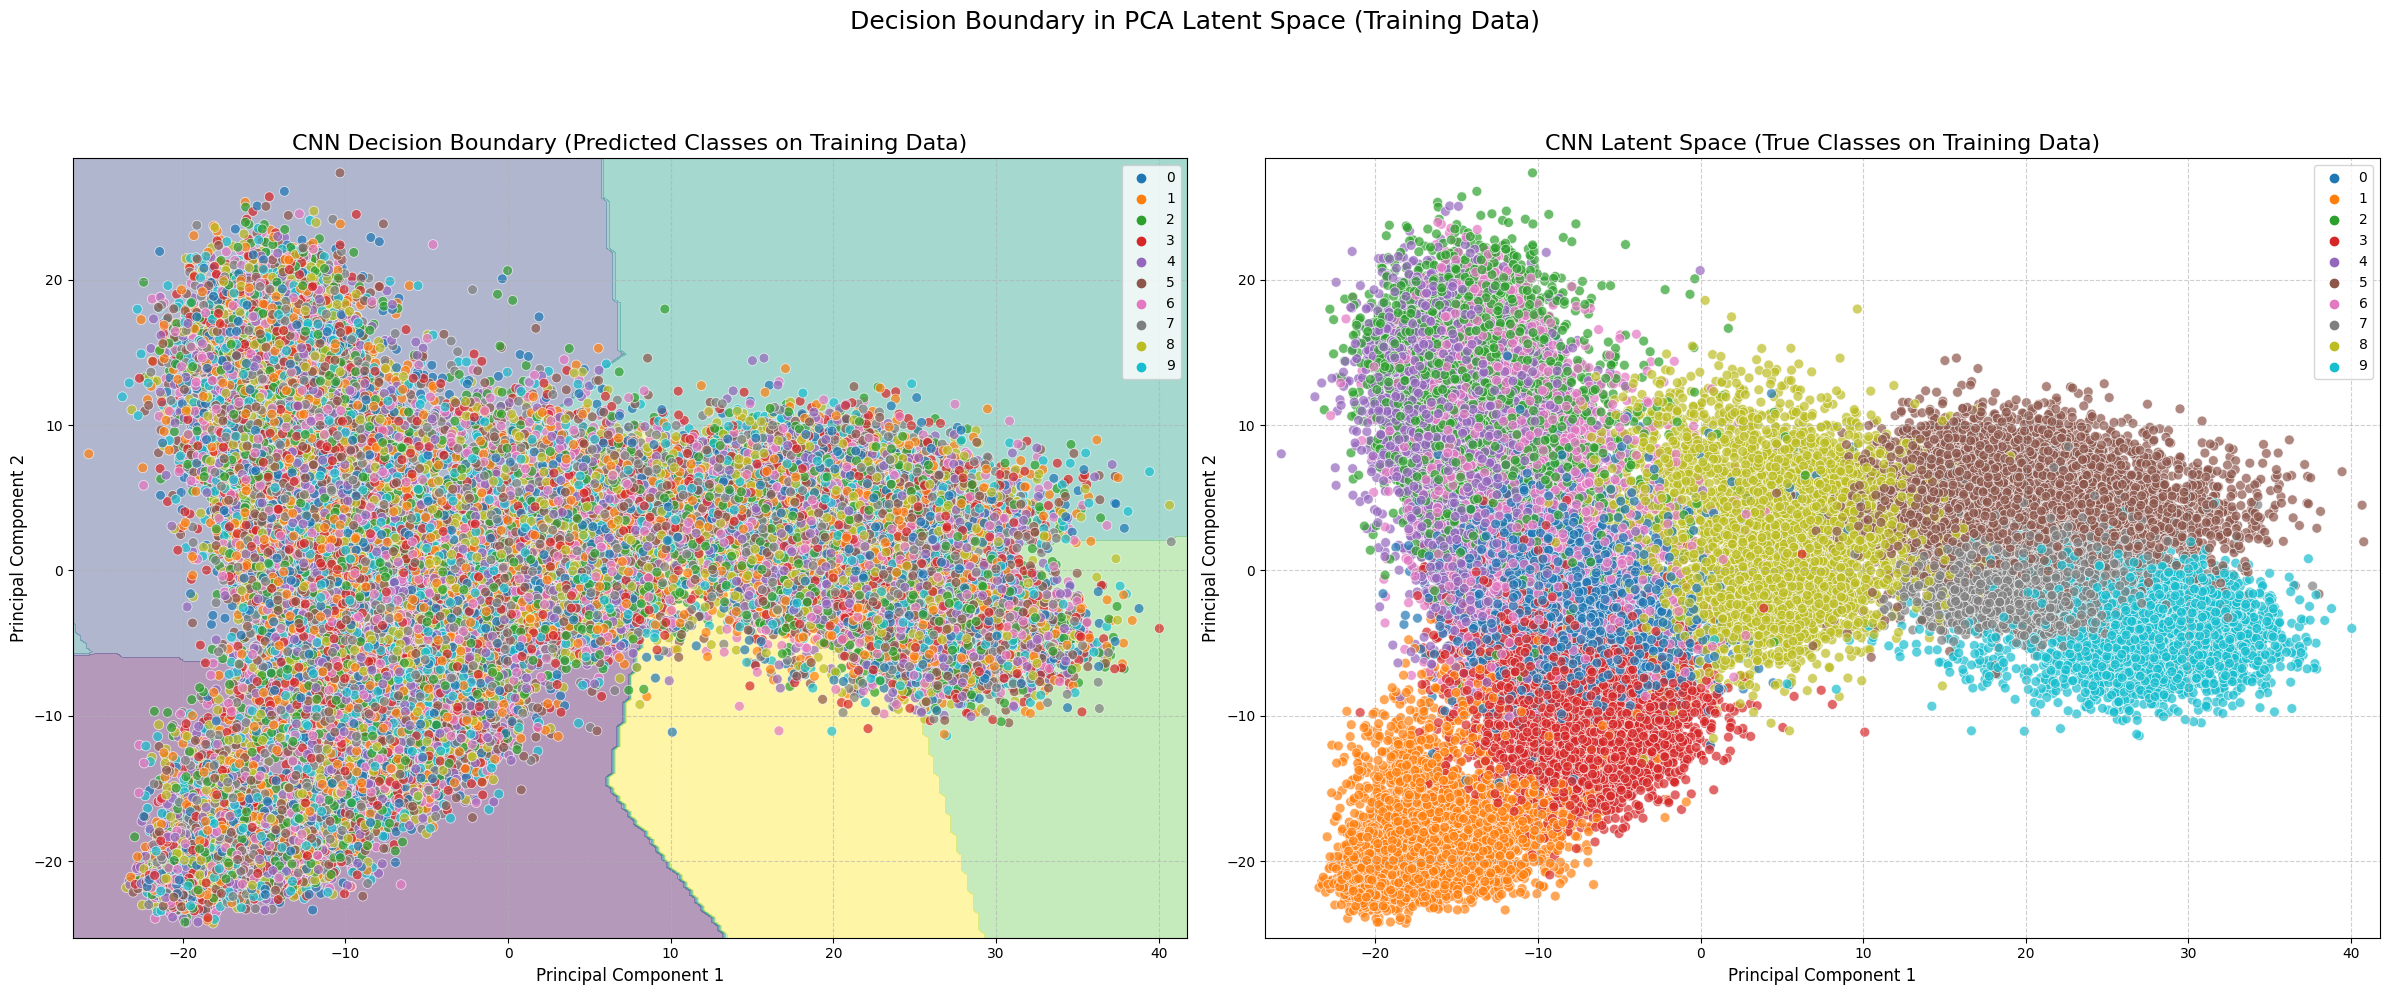

In [16]:
from sklearn.decomposition import PCA # For decision boundary visualization
# --- 9. Visualize Decision Boundary (Latent Space) ---
print("\n--- Visualizing CNN Latent Space (PCA of fc_intermediate output) on Training Data ---")

# Function to extract features from an intermediate layer
def get_intermediate_features(model, dataloader, device):
    model.eval()
    features_list = []
    labels_list = []
    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device) # Ensure images are on the correct device
            # Forward pass through conv layers and first FC layer
            x = model.pool1(model.relu1(model.conv1(images)))
            x = model.pool2(model.relu2(model.conv2(x)))
            x = x.view(-1, 64 * 7 * 7) # Flatten
            x = model.relu3(model.fc1(x)) # Output of fc1
            # Get the output of the intermediate dense layer
            intermediate_features = model.relu_intermediate(model.fc_intermediate(x))
            features_list.append(intermediate_features.cpu().numpy())
            labels_list.append(labels.cpu().numpy())
    return np.vstack(features_list), np.hstack(labels_list)

# Ensure the model is on the correct device before extracting features and making predictions
model.to(device) # Move model to the primary device (GPU if available)

# Extract intermediate features from the TRAINING set
intermediate_features_train, true_labels_train = get_intermediate_features(model, train_loader, device)

# Apply PCA to reduce dimensionality to 2D
# Fit PCA on the training features
pca = PCA(n_components=2)
pca.fit(intermediate_features_train)
pca_features_train = pca.transform(intermediate_features_train)

# Get model predictions for the TRAINING set
model.eval() # Set model to evaluation mode
all_preds_train = []
with torch.no_grad():
    for images, _ in train_loader:
        images = images.to(device) # Ensure images are on the correct device
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_preds_train.append(predicted.cpu().numpy())
predicted_labels_train = np.hstack(all_preds_train)


# --- Plotting Decision Boundary ---
# Create a meshgrid over the 2D PCA feature space of the training data
x_min, x_max = pca_features_train[:, 0].min() - 1, pca_features_train[:, 0].max() + 1
y_min, y_max = pca_features_train[:, 1].min() - 1, pca_features_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Create a flattened meshgrid for prediction
meshgrid_points_2d = np.c_[xx.ravel(), yy.ravel()]

# Reconstruct 64-dim features from 2D PCA space
reconstructed_64d_features = pca.inverse_transform(meshgrid_points_2d)

# Convert reconstructed features to PyTorch tensor and move to device
reconstructed_64d_tensor = torch.tensor(reconstructed_64d_features, dtype=torch.float32).to(device)

# Get predictions from the model's final classification layer using the reconstructed features
model.eval()
with torch.no_grad():
    outputs_meshgrid = model.fc_output(reconstructed_64d_tensor)
    _, Z = torch.max(outputs_meshgrid.data, 1)
    Z = Z.cpu().numpy().reshape(xx.shape)

# Define a color map for the decision regions
cmap_regions = plt.cm.get_cmap('viridis', 10) # 10 classes
# Define a color map for scatter plots
cmap_scatter = sns.color_palette("tab10", n_colors=10)

# Create a single figure with two subplots for decision boundary visualization
fig_db, axes_db = plt.subplots(1, 2, figsize=(24, 10)) # Adjusted figure size

# Subplot 1: Decision Boundary with Predicted Class (Training Data)
ax_db1 = axes_db[0]
contourf_plot = ax_db1.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_regions)
sns.scatterplot(
    x=pca_features_train[:, 0], # Use training PCA features
    y=pca_features_train[:, 1], # Use training PCA features
    hue=predicted_labels_train, # Color by predicted label on training data
    palette=cmap_scatter,
    legend='full',
    alpha=0.7,
    s=50,
    ax=ax_db1 # Specify the subplot axis
)
ax_db1.set_title('CNN Decision Boundary (Predicted Classes on Training Data)', fontsize=16)
ax_db1.set_xlabel('Principal Component 1', fontsize=12)
ax_db1.set_ylabel('Principal Component 2', fontsize=12)
ax_db1.grid(True, linestyle='--', alpha=0.6)
ax_db1.set_xlim(xx.min(), xx.max())
ax_db1.set_ylim(yy.min(), yy.max())

# Subplot 2: Latent Space with True Class (Training Data, without decision boundary regions)
ax_db2 = axes_db[1]
sns.scatterplot(
    x=pca_features_train[:, 0], # Use training PCA features
    y=pca_features_train[:, 1], # Use training PCA features
    hue=true_labels_train, # Color by true label on training data
    palette=cmap_scatter,
    legend='full',
    alpha=0.7,
    s=50,
    ax=ax_db2 # Specify the subplot axis
)
ax_db2.set_title('CNN Latent Space (True Classes on Training Data)', fontsize=16) # Updated title
ax_db2.set_xlabel('Principal Component 1', fontsize=12)
ax_db2.set_ylabel('Principal Component 2', fontsize=12)
ax_db2.grid(True, linestyle='--', alpha=0.6)
ax_db2.set_xlim(xx.min(), xx.max())
ax_db2.set_ylim(yy.min(), yy.max())

fig_db.suptitle('Decision Boundary in PCA Latent Space (Training Data)', fontsize=18, y=1.02) # Overall title
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout for overall figure
plt.show()


# Model Evaluation

In [17]:
# --- 7. Final Evaluation on Test Set ---
print("\n--- Final Evaluation on Test Set ---")
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    final_accuracy = 100 * correct / total
    print(f'Final Test Accuracy of the CNN model: {final_accuracy:.2f}%')
print("="*40 + "\n")


--- Final Evaluation on Test Set ---
Final Test Accuracy of the CNN model: 92.47%



## Classification metrics and classification reports evaluation

In [18]:
from sklearn.metrics import ( # Import necessary metrics for evaluation
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
)


# --- 7. Final Evaluation on Test Set and Performance Metrics ---
print("\n--- Final Evaluation on Test Set and Performance Metrics ---")
model.eval()
all_labels = []
all_predictions = []
all_probabilities = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        
        # For CrossEntropyLoss, outputs are logits. Apply softmax to get probabilities.
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs.data, 1)

        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())
        all_probabilities.extend(probabilities.cpu().numpy())

y_true_test_np = np.array(all_labels)
y_pred_test_np = np.array(all_predictions)
y_pred_proba_test_np = np.array(all_probabilities)

# Calculate metrics
cm = confusion_matrix(y_true_test_np, y_pred_test_np)
accuracy = accuracy_score(y_true_test_np, y_pred_test_np)
# For precision, recall, f1, roc_auc, we need probabilities for each class for multi-class
# roc_auc_score for multi-class requires `y_score` to be probabilities of each class
precision = precision_score(y_true_test_np, y_pred_test_np, average='macro', zero_division=1)
recall = recall_score(y_true_test_np, y_pred_test_np, average='macro', zero_division=1)
f1 = f1_score(y_true_test_np, y_pred_test_np, average='macro', zero_division=1)
roc_auc_val = roc_auc_score(y_true_test_np, y_pred_proba_test_np, multi_class='ovr') # 'ovr' for one-vs-rest

# Print the results\
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision (macro): {precision:.3f}")
print(f"Recall (macro): {recall:.3f}")
print(f"F1-score (macro): {f1:.3f}")
print(f"AUC-ROC (OvR): {roc_auc_val:.3f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_true_test_np, y_pred_test_np, zero_division=1))
print("="*40 + "\n")


--- Final Evaluation on Test Set and Performance Metrics ---
Accuracy: 0.925
Precision (macro): 0.924
Recall (macro): 0.925
F1-score (macro): 0.924
AUC-ROC (OvR): 0.996

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1000
           1       0.98      0.99      0.98      1000
           2       0.85      0.91      0.88      1000
           3       0.91      0.94      0.93      1000
           4       0.91      0.87      0.89      1000
           5       0.98      0.98      0.98      1000
           6       0.82      0.75      0.78      1000
           7       0.96      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000




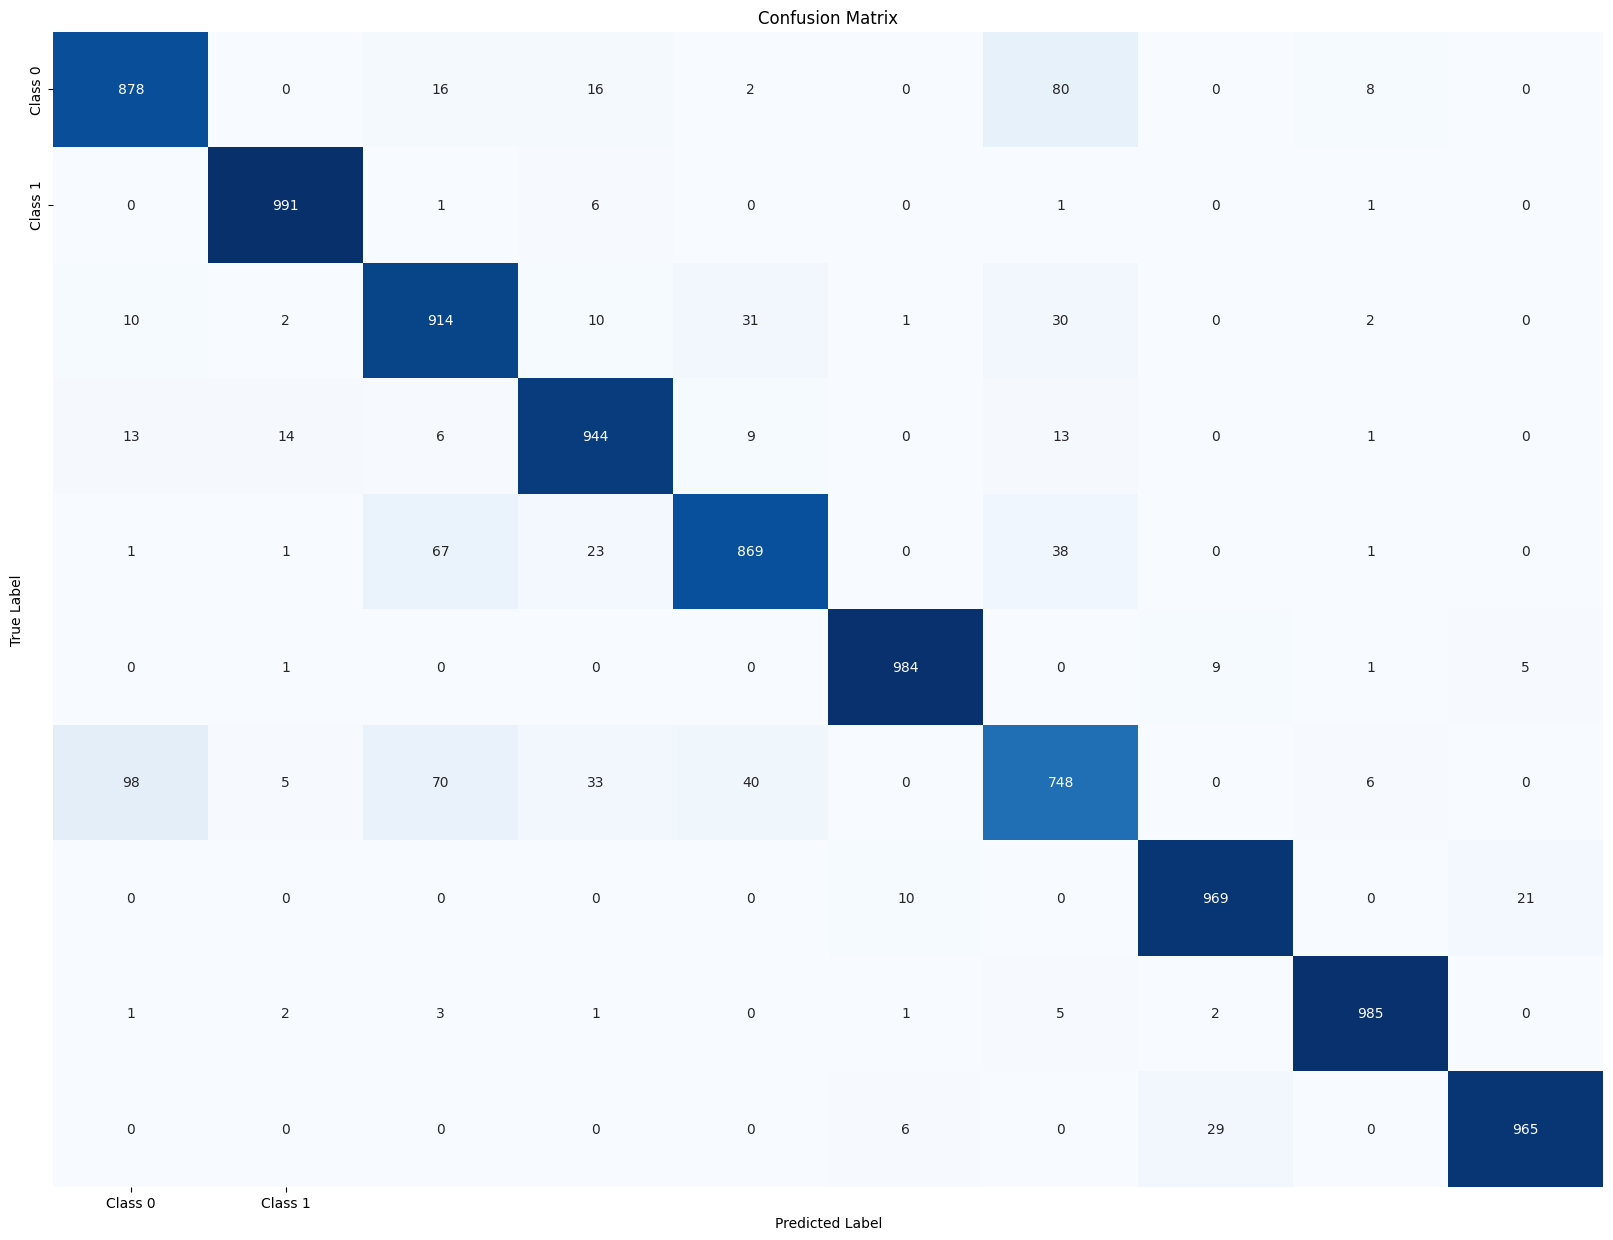

In [19]:
# --- Plotting Confusion Matrix ---
plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


--- Plotting Precision-Recall Curve ---


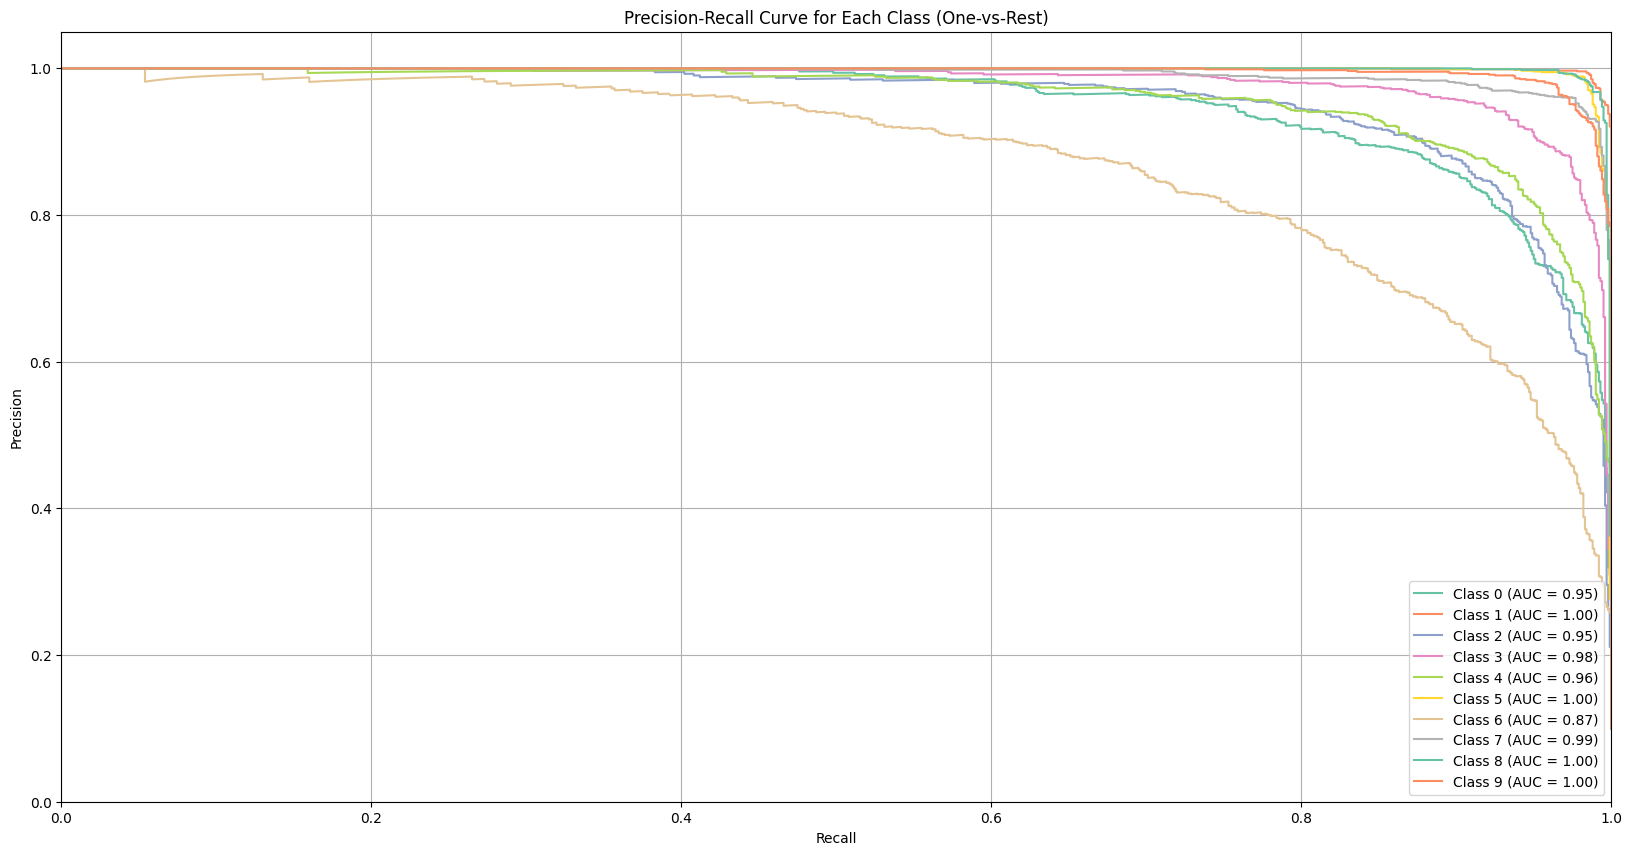

In [20]:
from sklearn.metrics import ( # Import necessary metrics for evaluation
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    precision_recall_curve, # Import precision_recall_curve
    auc, # Import auc
    roc_curve # Import roc_curve
)
# --- Plotting Precision-Recall Curve ---
print("\n--- Plotting Precision-Recall Curve ---")

# Define class labels (for multi-class, these are 0-9 for Fashion MNIST)
# Assuming 10 classes based on the model's output layer
num_classes_pr = model.fc_output.out_features
class_labels_pr = [str(i) for i in range(num_classes_pr)]

# Initialize a plot
plt.figure(figsize=(20, 10))

# Set Seaborn color palette
sns.set_palette("Set2")

# y_pred_proba_test_np is already calculated in Section 7 and contains probabilities for all classes
# y_true_test_np is also available from Section 7

# Generate Precision-Recall curve for each class (One-vs-Rest)
for i, label_str in enumerate(class_labels_pr):
    class_val = int(label_str)
    
    # Create a binary array for the current class (1 if it's the class, 0 otherwise)
    y_test_bin = np.where(y_true_test_np == class_val, 1, 0)

    # Use the probabilities for the current class
    y_pred_score = y_pred_proba_test_np[:, class_val]

    # Compute Precision-Recall values
    precision, recall, _ = precision_recall_curve(y_test_bin, y_pred_score)
    # Calculate AUC for the Precision-Recall curve
    pr_auc = auc(recall, precision)

    # Plot the curve
    plt.plot(recall, precision, label=f'Class {label_str} (AUC = {pr_auc:.2f})')

# Add plot details
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Each Class (One-vs-Rest)")
plt.legend(loc="lower right")
plt.ylim([0, 1.05])
plt.xlim([0, 1])
plt.grid(True) # Add a grid for better readability

# Show the plot
plt.show()

In [21]:
# --- 9. Visualize Decision Boundary (Latent Space) ---
print("\n--- Visualizing CNN Latent Space (PCA of fc_intermediate output) on Test Data ---")

# Function to extract features from an intermediate layer
def get_intermediate_features(model, dataloader, device):
    model.eval()
    features_list = []
    labels_list = []
    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device) # Ensure images are on the correct device
            # Forward pass through conv layers and first FC layer
            x = model.pool1(model.relu1(model.conv1(images)))
            x = model.pool2(model.relu2(model.conv2(x)))
            x = x.view(-1, 64 * 7 * 7) # Flatten
            x = model.relu3(model.fc1(x)) # Output of fc1
            # Get the output of the intermediate dense layer
            intermediate_features = model.relu_intermediate(model.fc_intermediate(x))
            features_list.append(intermediate_features.cpu().numpy())
            labels_list.append(labels.cpu().numpy())
    return np.vstack(features_list), np.hstack(labels_list)

# Ensure the model is on the correct device before extracting features and making predictions
model.to(device) # Move model to the primary device (GPU if available)

# Extract intermediate features from the TEST set
intermediate_features_test, true_labels_test = get_intermediate_features(model, test_loader, device)

# Apply PCA to reduce dimensionality to 2D
# Fit PCA on the test features
pca = PCA(n_components=2)
pca.fit(intermediate_features_test)
pca_features_test = pca.transform(intermediate_features_test)

# Get model predictions for the TEST set
model.eval() # Set model to evaluation mode
all_preds_test = []
with torch.no_grad():
    for images, _ in test_loader:
        images = images.to(device) # Ensure images are on the correct device
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_preds_test.append(predicted.cpu().numpy())
predicted_labels_test = np.hstack(all_preds_test)


# --- Plotting Decision Boundary ---
# Create a meshgrid over the 2D PCA feature space of the test data
x_min, x_max = pca_features_test[:, 0].min() - 1, pca_features_test[:, 0].max() + 1
y_min, y_max = pca_features_test[:, 1].min() - 1, pca_features_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Create a flattened meshgrid for prediction
meshgrid_points_2d = np.c_[xx.ravel(), yy.ravel()]

# Reconstruct 64-dim features from 2D PCA space
reconstructed_64d_features = pca.inverse_transform(meshgrid_points_2d)

# Convert reconstructed features to PyTorch tensor and move to device
reconstructed_64d_tensor = torch.tensor(reconstructed_64d_features, dtype=torch.float32).to(device)

# Get predictions from the model's final classification layer using the reconstructed features
model.eval()
with torch.no_grad():
    outputs_meshgrid = model.fc_output(reconstructed_64d_tensor)
    _, Z = torch.max(outputs_meshgrid.data, 1)
    Z = Z.cpu().numpy().reshape(xx.shape)

# Define a color map for the decision regions
cmap_regions = plt.cm.get_cmap('viridis', 10) # 10 classes
# Define a color map for scatter plots
cmap_scatter = sns.color_palette("tab10", n_colors=10)

# Create a single figure with two subplots for decision boundary visualization
fig_db, axes_db = plt.subplots(1, 2, figsize=(24, 10)) # Adjusted figure size

# Subplot 1: Decision Boundary with Predicted Class (Test Data)
ax_db1 = axes_db[0]
contourf_plot = ax_db1.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_regions)
sns.scatterplot(
    x=pca_features_test[:, 0], # Use test PCA features
    y=pca_features_test[:, 1], # Use test PCA features
    hue=predicted_labels_test, # Color by predicted label on test data
    palette=cmap_scatter,
    legend='full',
    alpha=0.7,
    s=50,
    ax=ax_db1 # Specify the subplot axis
)
ax_db1.set_title('CNN Decision Boundary (Predicted Classes on Test Data)', fontsize=16)
ax_db1.set_xlabel('Principal Component 1', fontsize=12)
ax_db1.set_ylabel('Principal Component 2', fontsize=12)
ax_db1.grid(True, linestyle='--', alpha=0.6)
ax_db1.set_xlim(xx.min(), xx.max())
ax_db1.set_ylim(yy.min(), yy.max())

# Subplot 2: Latent Space with True Class (Test Data, without decision boundary regions)
ax_db2 = axes_db[1]
sns.scatterplot(
    x=pca_features_test[:, 0], # Use test PCA features
    y=pca_features_test[:, 1], # Use test PCA features
    hue=true_labels_test, # Color by true label on test data
    palette=cmap_scatter,
    legend='full',
    alpha=0.7,
    s=50,
    ax=ax_db2 # Specify the subplot axis
)
ax_db2.set_title('CNN Latent Space (True Classes on Test Data)', fontsize=16) # Updated title
ax_db2.set_xlabel('Principal Component 1', fontsize=12)
ax_db2.set_ylabel('Principal Component 2', fontsize=12)
ax_db2.grid(True, linestyle='--', alpha=0.6)
ax_db2.set_xlim(xx.min(), xx.max())
ax_db2.set_ylim(yy.min(), yy.max())

fig_db.suptitle('Decision Boundary in PCA Latent Space (Test Data)', fontsize=18, y=1.02) # Overall title
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout for overall figure
plt.show()


--- Visualizing CNN Latent Space (PCA of fc_intermediate output) on Test Data ---


/tmp/ipykernel_13/462395430.py:71: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_regions = plt.cm.get_cmap('viridis', 10) # 10 classes
